# 시계열 데이터 분석




        Month  Ridership
0  01/01/1991   1708.917
1  01/02/1991   1620.586
2  01/03/1991   1972.715
3  01/04/1991   1811.665
4  01/05/1991   1974.964
        Month  Ridership       Date
0  01/01/1991   1708.917 1991-01-01
1  01/02/1991   1620.586 1991-02-01
2  01/03/1991   1972.715 1991-03-01
3  01/04/1991   1811.665 1991-04-01
4  01/05/1991   1974.964 1991-05-01
<class 'pandas.core.series.Series'>


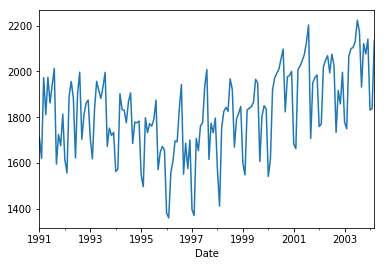

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools

df = pd.read_csv('./data/amtrak.csv')
print(df.head())

# Date 필드 추가(datetime객체로 들어가는 듯)
df['Date'] = pd.to_datetime(df['Month'], format='%d/%m/%Y')

print(df.head())

series_ts = pd.Series(df['Ridership'].values, index = df['Date'], name='Ridership')
print(type(series_ts))

series_ts.index = pd.DatetimeIndex(series_ts.index, freq = series_ts.index.inferred_freq)

# plot
ax = series_ts.plot()



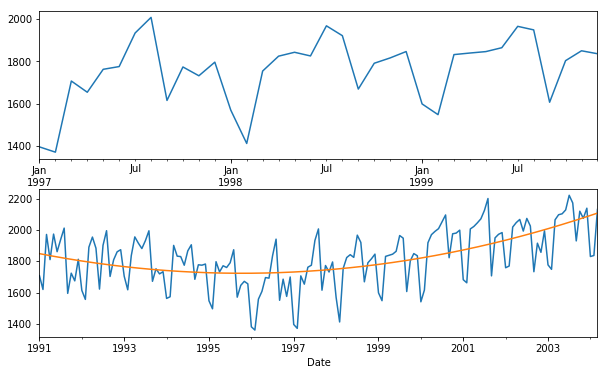

In [40]:
ts_3yrs = series_ts['1997':'1999']
ts_3yrs.head()

df3 = tsatools.add_trend(series_ts, trend='ctt')
ts_lm = sm.ols(
    formula = 'Ridership ~ trend + trend_squared'
    , data = df3
).fit()

ts_lm

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(10, 6))

ts_3yrs.plot(ax = axes[0])
series_ts.plot(ax = axes[1])

# 예측한 결과 데이터를 1번 그림에다가 그려 넣기
ts_lm.predict(df3).plot(ax = axes[1])
